In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "../data/tokenized/data_cleaned_full_with_tokens.csv"
df = pd.read_csv(file_path)
print(df.head())

   review_id       user_id user_name      hotel_id               hotel_name  \
0          1  b1d300f73f64       Mhd  h_810b907500  فندق سيتي سيزنز الحمراء   
1          2  656051c1420c   Mohamed  h_810b907500  فندق سيتي سيزنز الحمراء   
2          3  82aff2c692d6   Hussain  h_810b907500  فندق سيتي سيزنز الحمراء   
3          4  8bf28e8cf9da     Nader  h_810b907500  فندق سيتي سيزنز الحمراء   
4          5  656051c1420c   Mohamed  h_810b907500  فندق سيتي سيزنز الحمراء   

                   location country distance_center hotel_rating_label  \
0  وسط مدينة أبوظبي, أبوظبي  أبوظبي        0.05 كلم   نقاط التقييم 8.6   
1  وسط مدينة أبوظبي, أبوظبي  أبوظبي        0.05 كلم   نقاط التقييم 8.6   
2  وسط مدينة أبوظبي, أبوظبي  أبوظبي        0.05 كلم   نقاط التقييم 8.6   
3  وسط مدينة أبوظبي, أبوظبي  أبوظبي        0.05 كلم   نقاط التقييم 8.6   
4  وسط مدينة أبوظبي, أبوظبي  أبوظبي        0.05 كلم   نقاط التقييم 8.6   

        price  ...  hotel_avg_rating hotel_rating_std hotel_review_count  \
0  3

In [5]:
# Map -1,0,1 to 0,0.5,1
df['sentiment_score'] = df['sentiment_predicted'].map({-1:0, 0:0.5, 1:1})

In [17]:
max_rating = 10
df['Score_final'] = (0.5 * df['rating_normalized'] + 0.5 * df['sentiment_score']) * max_rating
print(df[['rating_normalized', 'sentiment_score', 'Score_final']].head())


   rating_normalized  sentiment_score  Score_final
0                1.0              1.0         10.0
1                0.9              1.0          9.5
2                0.9              1.0          9.5
3                0.8              1.0          9.0
4                0.9              1.0          9.5


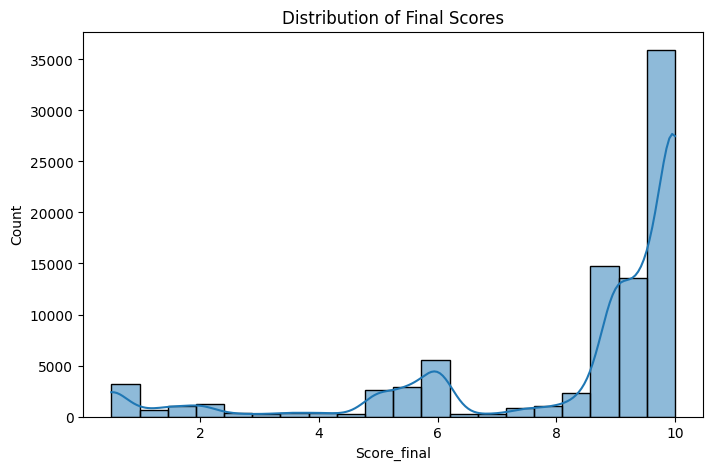

In [18]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Score_final'], bins=20, kde=True)
plt.title("Distribution of Final Scores")
plt.xlabel("Score_final")
plt.show()

count    87812.000000
mean         8.351751
std          2.564841
min          0.500000
25%          8.500000
50%          9.500000
75%         10.000000
max         10.000000
Name: Score_final, dtype: float64


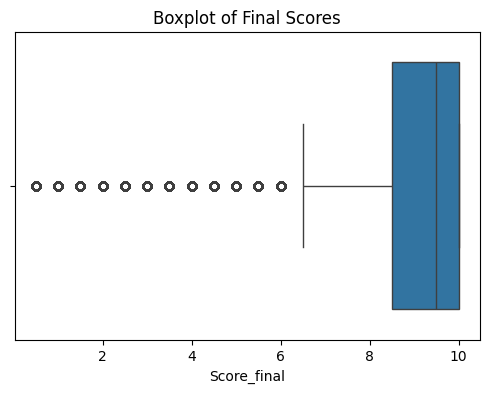

In [19]:
# Simple statistical check
print(df['Score_final'].describe())

# Optional: boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Score_final'])
plt.title("Boxplot of Final Scores")
plt.show()

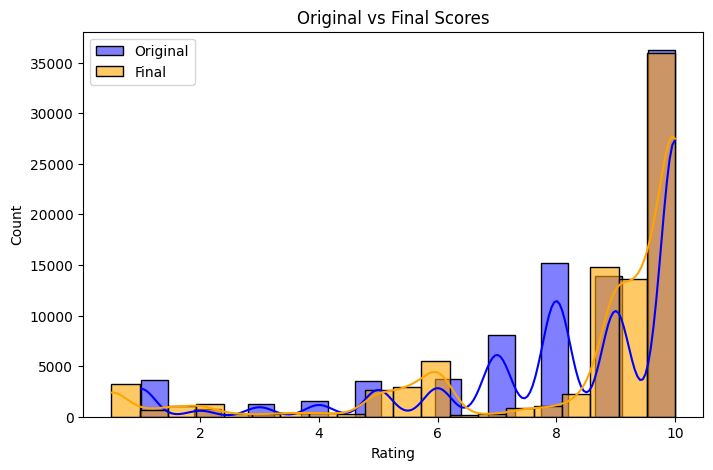

In [20]:
if 'rating' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['rating'], color='blue', label='Original', bins=20, kde=True)
    sns.histplot(df['Score_final'], color='orange', label='Final', bins=20, kde=True, alpha=0.6)
    plt.title("Original vs Final Scores")
    plt.xlabel("Rating")
    plt.legend()
    plt.show()

In [21]:
df.to_csv("../data/tokenized/data_cleaned_full_with_tokens_with_final_score.csv", index=False)
print("✅ Dataset with final scores saved successfully")

✅ Dataset with final scores saved successfully
